# COGS 108 - EDA Checkpoint

- Hongjie Zhu (HZ)
- Qingyue Li (QL)
- Kevin Lin (KL)
- Yvonne Luo (YL)
- Jason Chen (JC)

<a id='research_question'></a>
# Research Question

How did the outbreak of H1N1(2009) affect the natality (aka. birth rate) and mortality (aka. death rate) rates per 1,000 people of the countries which experienced the pandemic over the 21 years between 1999-2019?

How to measure: compare the difference of natality and mortality rate between time periods before (e.g. average natality and mortality rate over 10 years before the pandemic) and during the pandemic to figure out if there is a difference, and whether that difference is correlated with the pandemic (consider if there are any major historical events or natural disasters that had an impact on economy, politics, etc. acting as confounding factors).

# Setup

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import random

# Data Cleaning

Describe your data cleaning steps here.

In [58]:
## Dataset 1: H1N1 2009 case summary

## Read the csv file at first.
death_case_2009 = pd.read_csv('H1N1_DeathCase.csv')

## We only want the data from 2009-07-06 because we only need cumulative data from the last day.
## Also, we have to reset the index.
## We still need to delete the date since all the selected data are from 2009-07-06.
## We also want to remove the link since they are not related to our project.
death_case_2009_cleaned = death_case_2009[death_case_2009['Date'].isin(['2009-07-06'])].reset_index().drop(columns = ['index', 'Date', 'Link'])

## We want to create a list of contries that are affected by H1N1.
h1n1_country_list = death_case_2009_cleaned['Country'].tolist()

## Display the cleaned dataset and the list of affected countries.
death_case_2009_cleaned, h1n1_country_list


(                      Country  Cumulative no. of cases  \
 0                     Algeria                        5   
 1         Antigua and Barbuda                        2   
 2                   Argentina                     2485   
 3                   Australia                     5298   
 4                     Austria                       19   
 ..                        ...                      ...   
 130                 Venezuela                      206   
 131                  Viet Nam                      181   
 132            Virgin Islands                        1   
 133  West Bank and Gaza Strip                       60   
 134                     Yemen                        8   
 
      Cumulative no. of deaths  
 0                           0  
 1                           0  
 2                          60  
 3                          10  
 4                           0  
 ..                        ...  
 130                         0  
 131                      

In [59]:


## Dataset 2: Global birth rate over the years
## plan to separate out several datasets to use: birth rate of 2009, birth rate 10 years before(1999-2009), birth rate 10 years after(2009-2019)
## only include data for countries that were affected by h1n1

global_birth_rate = pd.read_csv("crude-birth-rate.csv")
num_observation2 = global_birth_rate.shape[0]

## birth rate of 2009
birth_rate_2009 = global_birth_rate[global_birth_rate['Year']==2009].drop(columns=["Code", "Year"])
birth_rate_2009.columns = ["country", "births per 1000"]
birth_rate_2009 = birth_rate_2009.set_index('country')
## birth_rate_2009.dropna there are no empty lines
birth_rate_2009 = birth_rate_2009[birth_rate_2009.index.isin(h1n1_country_list)] ##filter out countries that were not affected by h1n1

## birth rate 10 years before
birth_rate_9909 = global_birth_rate[(global_birth_rate['Year']>=1999) & (global_birth_rate['Year']<=2009)].drop(columns="Code")
birth_rate_9909.columns = ["country", "year", "births per 1000"] ## also want to put the years as column names instead but not sure how yet
birth_rate_9909 = birth_rate_9909.set_index('country')
birth_rate_9909 = birth_rate_9909[birth_rate_9909.index.isin(h1n1_country_list)] ##filter out countries that were not affected by h1n1
birth_rate_9909 = birth_rate_9909.pivot(columns='year', values = 'births per 1000').reset_index().set_index('country')


## birth rate 10 years after
birth_rate_0919 = global_birth_rate[(global_birth_rate['Year']>=2009) & (global_birth_rate['Year']<=2019)].drop(columns="Code")
birth_rate_0919.columns = ["country", "year", "births per 1000"] ## also want to put the years as column names instead but not sure how yet
birth_rate_0919 = birth_rate_0919.set_index('country')
birth_rate_0919 = birth_rate_0919[birth_rate_0919.index.isin(h1n1_country_list)] ##filter out countries that were not affected by h1n1
birth_rate_0919 = birth_rate_0919.pivot(columns='year', values = 'births per 1000').reset_index().set_index('country')

birth_rate_9919 = global_birth_rate[(global_birth_rate['Year']>=1999) & (global_birth_rate['Year']<=2019)].drop(columns='Code')
birth_rate_9919.columns = ["country", "year", "births per 1000"]
birth_rate_9919 = birth_rate_9919.set_index('country')
birth_rate_9919 = birth_rate_9919[birth_rate_9919.index.isin(h1n1_country_list)]
birth_rate_9919 = birth_rate_9919.pivot(columns='year', values = 'births per 1000').reset_index().set_index('country')
birth_rate_9919 = birth_rate_9919.set_axis(labels=range(1999, 2020) ,axis='columns')
birth_rate_9919

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Algeria,20.175,19.554,19.257,19.270,19.557,20.077,20.774,21.582,22.424,23.226,...,24.504,24.934,25.246,25.451,25.538,25.481,25.250,24.846,24.282,23.583
Antigua and Barbuda,19.943,19.840,19.635,19.339,18.977,18.566,18.137,17.720,17.341,17.014,...,16.547,16.396,16.272,16.152,16.026,15.883,15.717,15.530,15.327,15.107
Argentina,19.702,19.499,19.328,19.175,19.026,18.879,18.735,18.596,18.469,18.355,...,18.154,18.055,17.949,17.831,17.698,17.548,17.383,17.205,17.021,16.833
Australia,13.167,12.998,12.908,12.900,12.970,13.103,13.276,13.453,13.603,13.699,...,13.700,13.616,13.506,13.390,13.274,13.162,13.050,12.930,12.797,12.653
Austria,10.106,9.918,9.765,9.637,9.529,9.439,9.369,9.318,9.286,9.274,...,9.306,9.353,9.422,9.507,9.602,9.701,9.795,9.878,9.943,9.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United Kingdom,12.035,11.822,11.673,11.606,11.631,11.742,11.919,12.131,12.336,12.501,...,12.640,12.597,12.496,12.357,12.191,12.013,11.842,11.687,11.556,11.453
Uruguay,16.566,16.329,16.095,15.853,15.600,15.340,15.087,14.856,14.661,14.510,...,14.332,14.291,14.263,14.233,14.192,14.134,14.057,13.963,13.857,13.740
Vanuatu,33.558,33.384,33.250,33.144,33.054,32.971,32.887,32.797,32.696,32.578,...,32.262,32.048,31.794,31.502,31.174,30.814,30.424,30.015,29.595,29.175


In [60]:

## Dataset 3: global death rate over the years
death_rate_worldWide = pd.read_csv('crude_death_rate.csv')
#Drop useless columns 
death_rate_worldWide = death_rate_worldWide.drop(['Country Code', 'Indicator Code', 'Indicator Name', '2020','Unnamed: 65'], 1)
#Replace empty value with 'nan'
death_rate_worldWide = death_rate_worldWide.replace(r'^\s*$', np.nan, regex=True)
#Add tile to the dataframe()
#death_rate_worldWide = death_rate_worldWide.style.set_caption("Death rate, crude (per 1,000 people)")
#Only include country that has been affected by H1N1
death_rate_worldWide = death_rate_worldWide[death_rate_worldWide['Country Name'].isin(h1n1_country_list)]
death_rate_worldWide

/Users/aurorali/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
8,United Arab Emirates,15.714,14.761,13.814,12.890,11.999,11.148,10.339,9.567,8.830,...,1.403,1.382,1.369,1.363,1.366,1.377,1.398,1.429,1.470,1.521
9,Argentina,8.567,8.618,8.679,8.747,8.813,8.871,8.917,8.950,8.969,...,7.708,7.694,7.680,7.665,7.651,7.638,7.626,7.616,7.609,7.604
12,Antigua and Barbuda,9.643,9.356,9.068,8.780,8.497,8.226,7.978,7.761,7.581,...,6.055,6.085,6.116,6.151,6.188,6.227,6.270,6.316,6.366,6.422
13,Australia,8.600,8.500,8.700,8.700,9.000,8.800,8.900,8.700,9.100,...,6.500,6.600,6.600,6.400,6.600,6.600,6.600,6.500,6.300,6.700
14,Austria,12.700,12.100,12.700,12.800,12.300,13.000,12.500,12.900,12.900,...,9.200,9.100,9.400,9.400,9.200,9.600,9.200,9.500,9.500,9.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Ukraine,8.675,8.420,8.231,8.115,8.072,8.097,8.182,8.310,8.467,...,15.200,14.500,14.500,14.600,14.700,14.900,14.700,14.500,14.800,14.700
250,Uruguay,9.735,9.645,9.573,9.525,9.501,9.505,9.538,9.593,9.664,...,9.324,9.349,9.376,9.401,9.423,9.440,9.452,9.461,9.467,9.473
258,Vanuatu,16.007,15.567,15.119,14.664,14.208,13.760,13.333,12.938,12.578,...,5.526,5.529,5.527,5.514,5.489,5.450,5.396,5.334,5.266,5.197
260,Samoa,10.822,10.580,10.344,10.113,9.888,9.668,9.457,9.255,9.065,...,5.848,5.795,5.727,5.645,5.554,5.461,5.372,5.296,5.239,5.202


In [61]:
death_rate_worldWide = death_rate_worldWide.set_index('Country Name')
death_rate_worldWide = death_rate_worldWide.sort_index()
YearsToDrop = death_rate_worldWide[death_rate_worldWide.columns[0:39]]
death_rate_worldWide = death_rate_worldWide.drop(YearsToDrop, axis = 1)
birth_rate_9919 = birth_rate_9919[birth_rate_9919.index.isin(death_rate_worldWide.index)]
death_rate_worldWide = death_rate_worldWide[death_rate_worldWide.index.isin(birth_rate_9919.index)]


In [62]:
birth_rate_9919

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
country,,,,,,,,,,,,,,,,,,,,,
Algeria,20.175,19.554,19.257,19.270,19.557,20.077,20.774,21.582,22.424,23.226,...,24.504,24.934,25.246,25.451,25.538,25.481,25.250,24.846,24.282,23.583
Antigua and Barbuda,19.943,19.840,19.635,19.339,18.977,18.566,18.137,17.720,17.341,17.014,...,16.547,16.396,16.272,16.152,16.026,15.883,15.717,15.530,15.327,15.107
Argentina,19.702,19.499,19.328,19.175,19.026,18.879,18.735,18.596,18.469,18.355,...,18.154,18.055,17.949,17.831,17.698,17.548,17.383,17.205,17.021,16.833
Australia,13.167,12.998,12.908,12.900,12.970,13.103,13.276,13.453,13.603,13.699,...,13.700,13.616,13.506,13.390,13.274,13.162,13.050,12.930,12.797,12.653
Austria,10.106,9.918,9.765,9.637,9.529,9.439,9.369,9.318,9.286,9.274,...,9.306,9.353,9.422,9.507,9.602,9.701,9.795,9.878,9.943,9.987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,8.373,8.253,8.262,8.395,8.632,8.952,9.325,9.716,10.092,10.419,...,10.829,10.880,10.839,10.726,10.551,10.327,10.071,9.799,9.530,9.278
United Arab Emirates,17.043,16.494,15.996,15.514,15.024,14.518,14.001,13.490,13.010,12.581,...,11.888,11.616,11.377,11.159,10.958,10.772,10.603,10.456,10.331,10.223
United Kingdom,12.035,11.822,11.673,11.606,11.631,11.742,11.919,12.131,12.336,12.501,...,12.640,12.597,12.496,12.357,12.191,12.013,11.842,11.687,11.556,11.453


In [63]:
death_rate_worldWide

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country Name,,,,,,,,,,,,,,,,,,,,,
Algeria,5.050,4.961,4.882,4.814,4.757,4.710,4.674,4.651,4.639,4.637,...,4.656,4.670,4.685,4.699,4.709,4.715,4.717,4.717,4.716,4.716
Antigua and Barbuda,6.328,6.216,6.124,6.051,5.999,5.967,5.955,5.960,5.976,5.999,...,6.055,6.085,6.116,6.151,6.188,6.227,6.270,6.316,6.366,6.422
Argentina,7.862,7.845,7.830,7.815,7.802,7.788,7.775,7.762,7.749,7.735,...,7.708,7.694,7.680,7.665,7.651,7.638,7.626,7.616,7.609,7.604
Australia,6.800,6.700,6.600,6.800,6.600,6.500,6.400,6.400,6.700,6.700,...,6.500,6.600,6.600,6.400,6.600,6.600,6.600,6.500,6.300,6.700
Austria,9.800,9.600,9.300,9.400,9.500,9.100,9.100,9.000,9.000,9.000,...,9.200,9.100,9.400,9.400,9.200,9.600,9.200,9.500,9.500,9.400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ukraine,14.900,15.400,15.300,15.700,16.000,16.000,16.600,16.200,16.400,16.300,...,15.200,14.500,14.500,14.600,14.700,14.900,14.700,14.500,14.800,14.700
United Arab Emirates,1.924,1.869,1.816,1.763,1.710,1.658,1.605,1.555,1.508,1.467,...,1.403,1.382,1.369,1.363,1.366,1.377,1.398,1.429,1.470,1.521
United Kingdom,10.800,10.300,10.200,10.200,10.200,9.700,9.600,9.400,9.400,9.400,...,8.900,8.700,8.900,9.000,8.800,9.200,9.100,9.200,9.200,9.000


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

In [64]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION


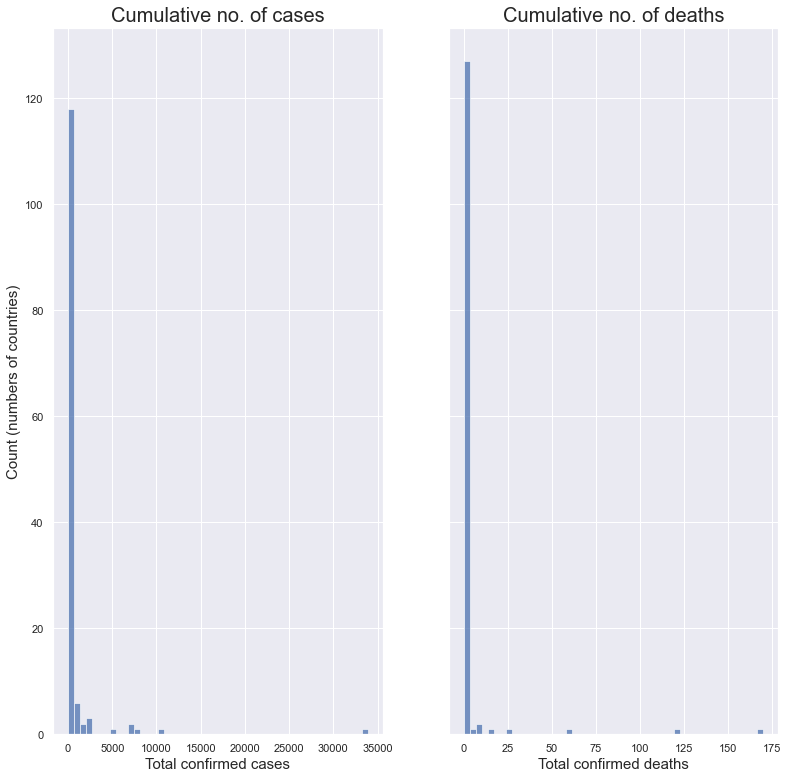

In [65]:
## Dataset1: Confirmed cases vs Total number of deaths 
## Histogram

fig, (ax1,ax2) = plt.subplots(ncols = 2, sharey = True)
sns.histplot(death_case_2009_cleaned['Cumulative no. of cases'], bins=50,ax = ax1)
ax1.set_title('Cumulative no. of cases', fontsize =20)
ax1.set_xlabel('Total confirmed cases',fontsize=15)
ax1.set_ylabel('Count (numbers of countries)',fontsize=15)
sns.histplot(death_case_2009_cleaned['Cumulative no. of deaths'], bins=50,ax = ax2)
ax2.set_title('Cumulative no. of deaths', fontsize=20)
ax2.set_xlabel('Total confirmed deaths',fontsize=15)
ax2.set_ylabel('Count (numbers of countries)',fontsize=15)
sns.set(rc = {'figure.figsize':(20,10)})

**These two graphs are right skewed histograms, which mean that only several countries have large number of death people and confirmed cases. From these two graphs, it is clear to know that the total confirmed cases of different countires center at the number below 2500 and the total confirmed death center at the number below 10. As a result, these two graphs imply that the H1N1 mainly affect a few countires heavily. There is one outlier located at the very right of the histogram of cumulative no. of cases; there are a few outliers located arbout 60, 120, and 170 on histogram of cumulative no. of death. There is no relationship between total confimed cases and count; no relationship between total confirmed deaths and count. **

Text(0, 0.5, 'birth rate')

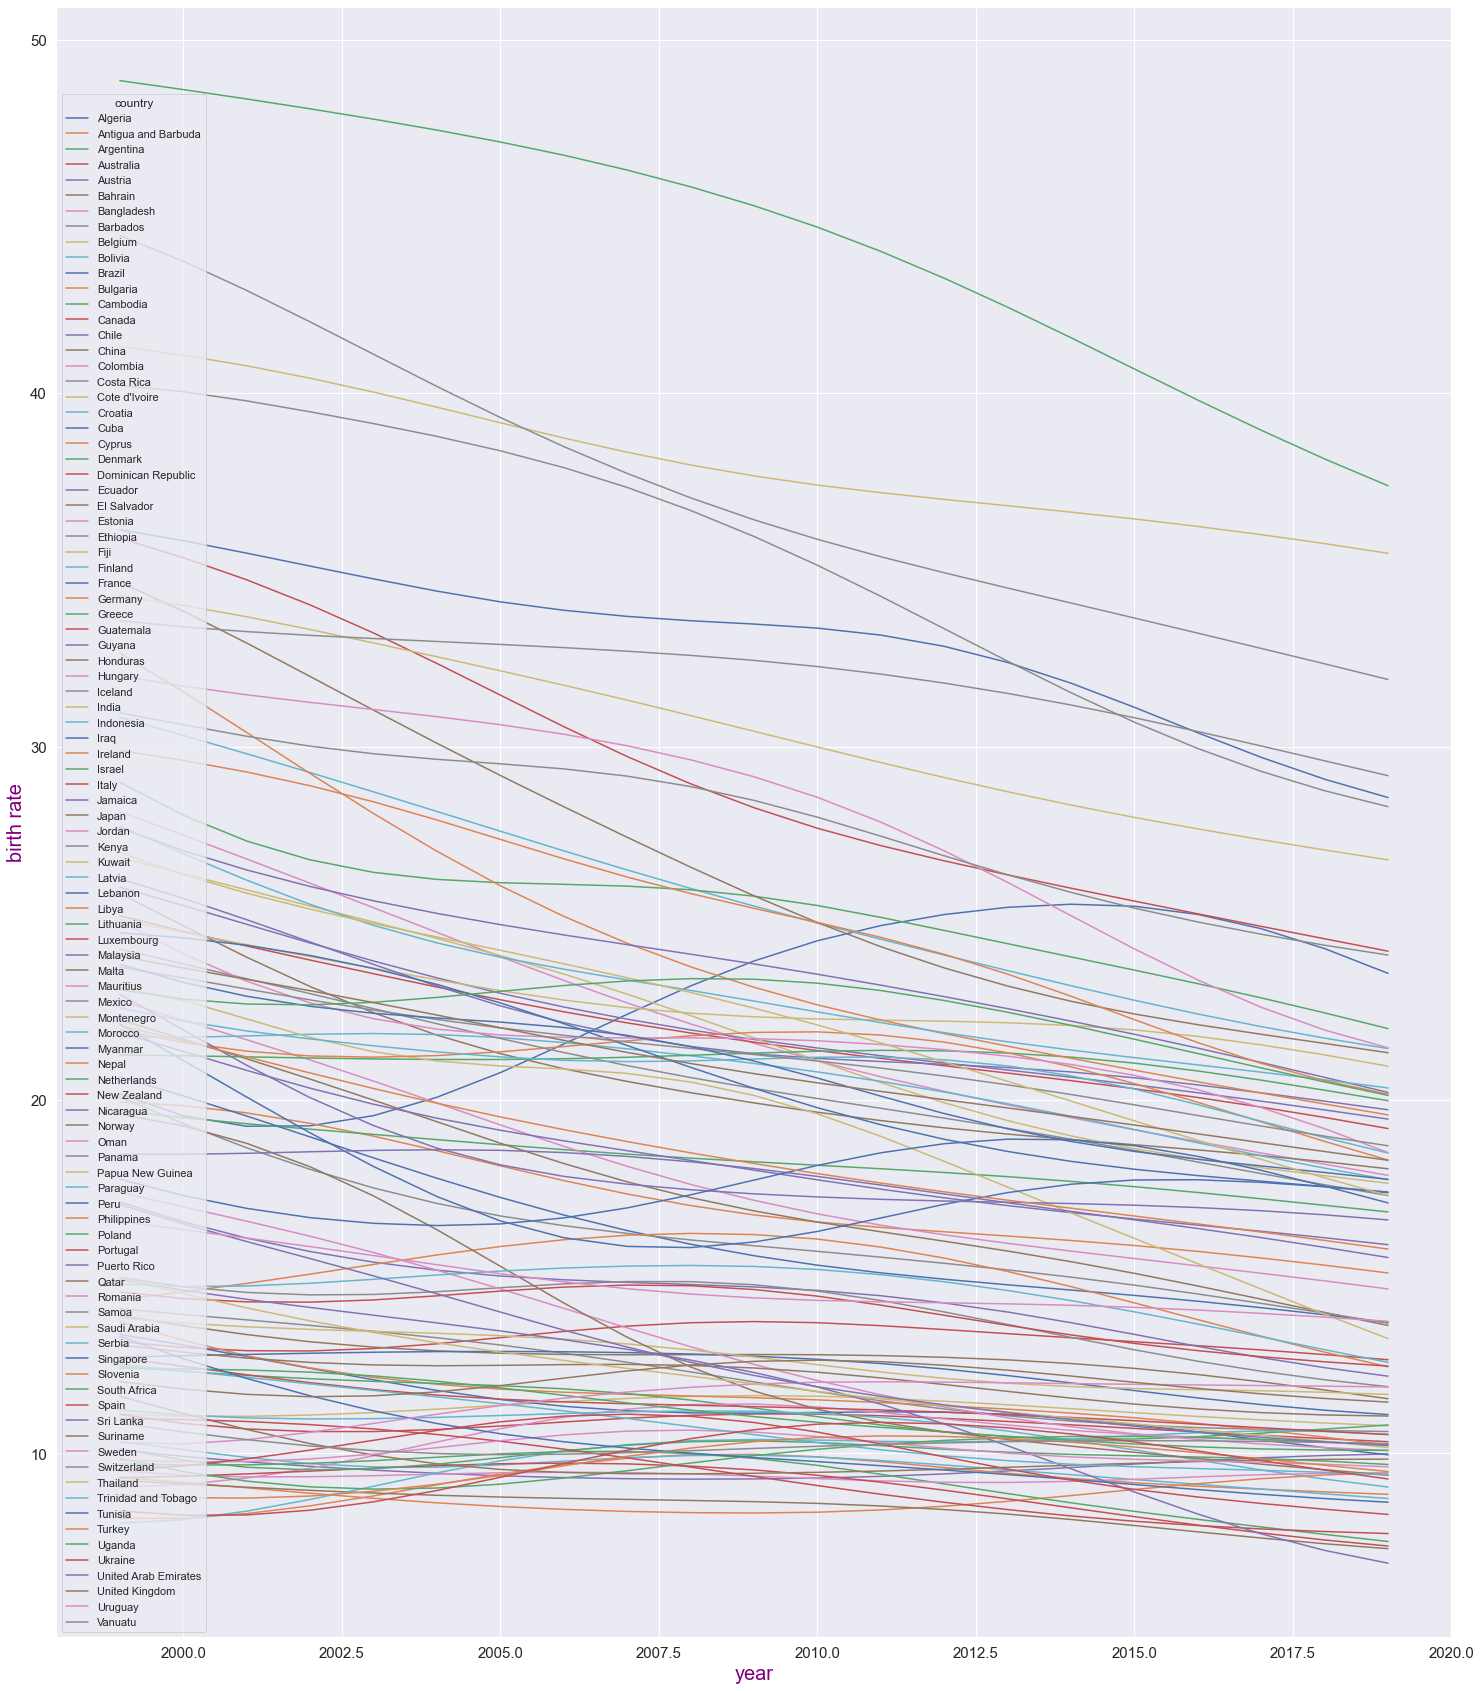

In [66]:
## Dataset 2: Global birth rate over the years
## Line plot
plt.rcParams["figure.figsize"] = (25,30)
lineplot = birth_rate_9919.T.plot(fontsize = 15)
lineplot.set_xlabel('year', fontsize = 20, color = 'purple')
lineplot.set_ylabel('birth rate', fontsize = 20, color = 'purple')


** From this line plot, birth rates in different countries generally show a slightly downward curve. In addition, the outliers are those countries with a plummeting birth rate or a drastic increase in the birth rate after 20 years. Generally, the year and birth rate have an inverse relationship; the birth rate decreases as time passes. However, the outliers do not follow this relationship. **

Text(0, 0.5, 'death rate')

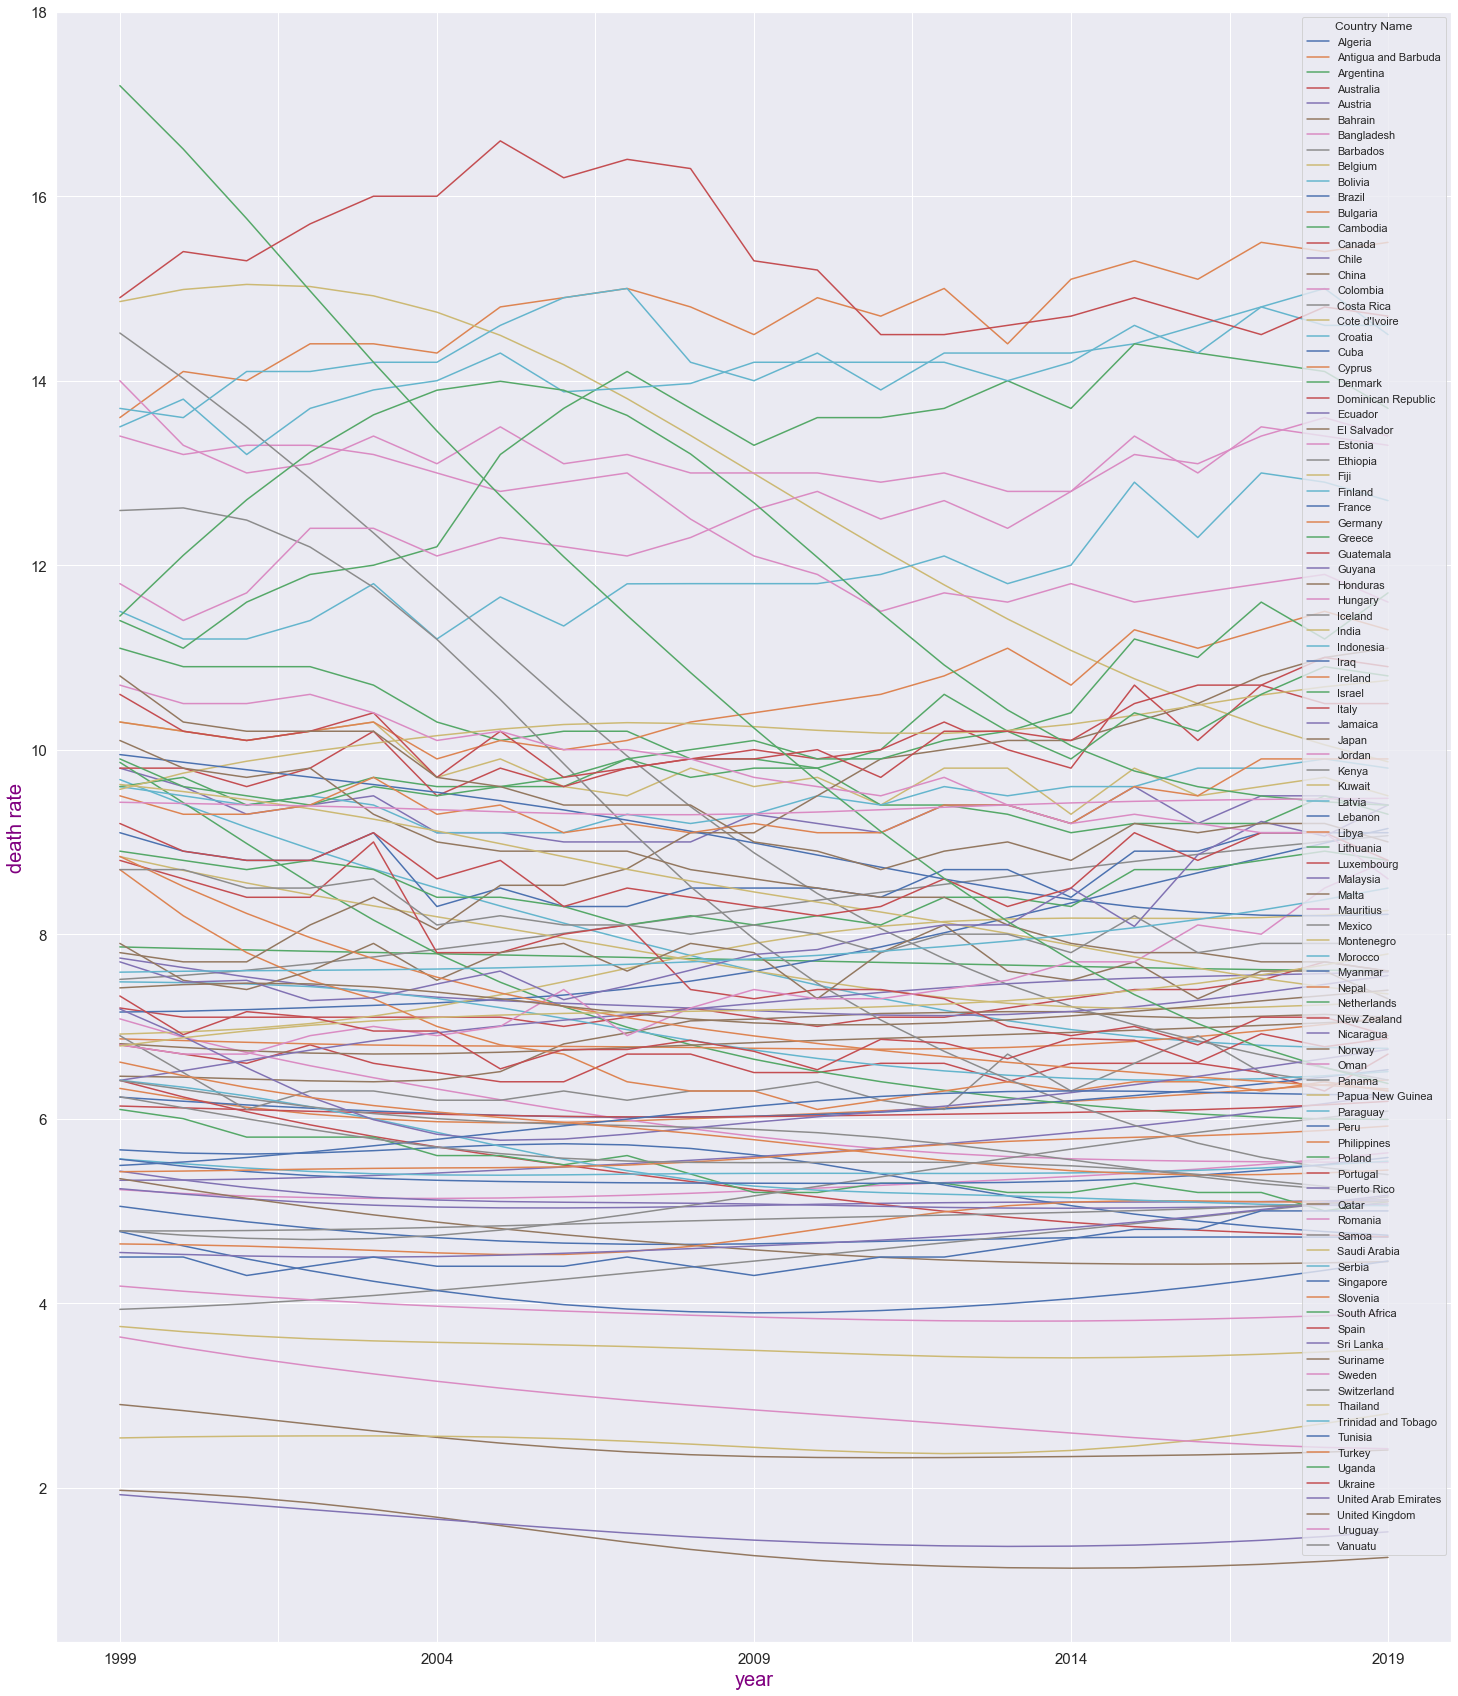

In [67]:
## Dataset 3: global death rate over the years
## Line plot
plt.rcParams["figure.figsize"] = (25,30)
lineplot = death_rate_worldWide.T.plot(fontsize = 15)
lineplot.set_xlabel('year', fontsize = 20, color = 'purple')
lineplot.set_ylabel('death rate', fontsize = 20, color = 'purple')


** From this line plot, death rates in different countries generally do not have a big difference in 20 years; they have been pretty stable over time. The outliers are those countries with a huge difference in death rates over 20 years. This line plot shows the change in death rate for different countries over time and it might show us the data we are looking for before and after the pandemic. The death rate and the time have a linear relationship; the death rates are about the same over the period, which shows that they have a linear relationship since the death rate rarely changes over time. The outliers do not follow this relationship. **

In [68]:
birth_rate_9919.describe()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,19.768541,19.435306,19.131735,18.860133,18.620102,18.408449,18.219622,18.046173,17.878663,17.708622,...,17.338735,17.132520,16.914745,16.688847,16.456010,16.218133,15.977286,15.736184,15.497418,15.263235
std,9.093960,8.961938,8.808384,8.639258,8.462161,8.283125,8.109435,7.947012,7.798367,7.663726,...,7.428900,7.319853,7.209914,7.095735,6.976498,6.853125,6.727774,6.604249,6.485183,6.371251
min,8.028000,8.129000,8.262000,8.395000,8.632000,8.604000,8.500000,8.419000,8.361000,8.326000,...,8.339000,8.403000,8.414000,8.286000,8.133000,7.962000,7.783000,7.608000,7.258000,6.897000
25%,12.419750,12.327250,12.131000,11.716250,11.669500,11.612750,11.438500,11.462250,11.413000,11.369250,...,11.182500,11.091250,10.882000,10.745750,10.577000,10.511500,10.460000,10.389250,10.317750,10.226750
50%,19.031500,18.865000,18.570000,18.074000,17.399500,16.761000,16.536500,16.274500,16.199500,15.981000,...,15.892500,15.697000,15.454500,15.171500,14.855000,14.617000,14.409500,14.185500,13.931500,13.655500
75%,25.096000,24.700500,24.277000,23.771750,23.369750,23.122500,22.725500,22.181000,22.093500,21.876000,...,21.393250,21.243250,21.070750,20.900500,20.674250,20.404000,20.036250,19.689250,19.135750,18.657000
max,48.837000,48.584000,48.318000,48.040000,47.748000,47.438000,47.101000,46.728000,46.308000,45.834000,...,44.693000,44.007000,43.248000,42.428000,41.564000,40.680000,39.800000,38.947000,38.135000,37.377000


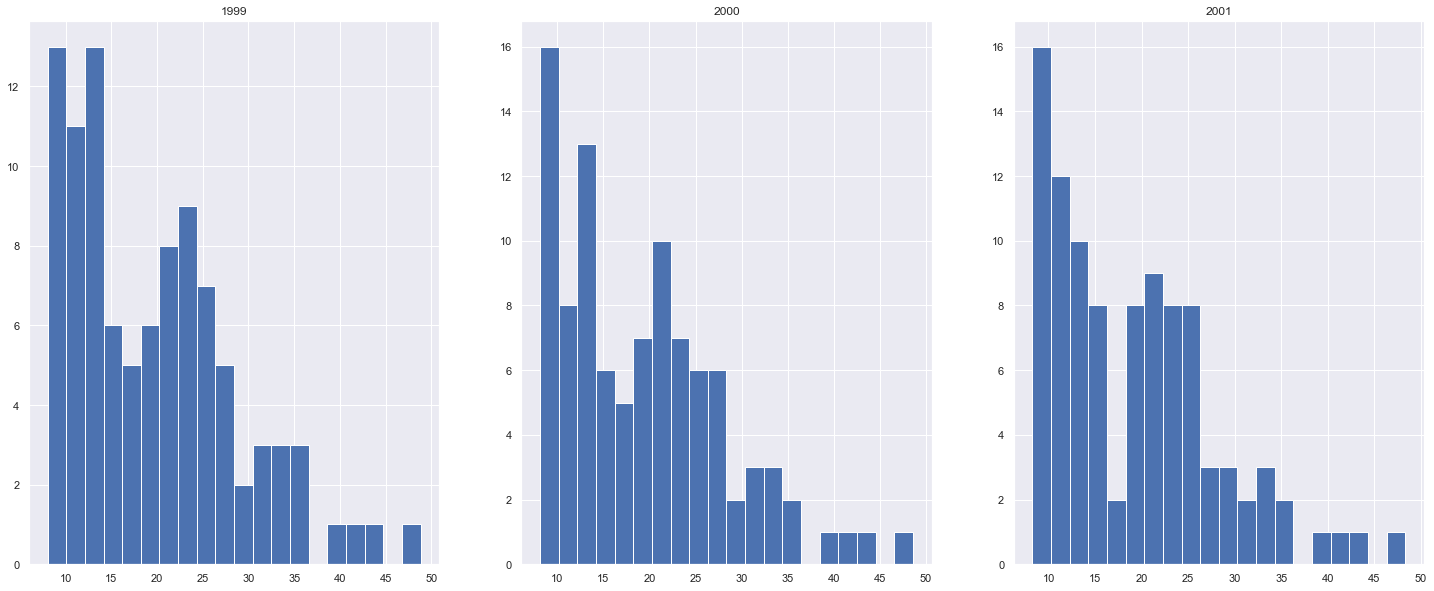

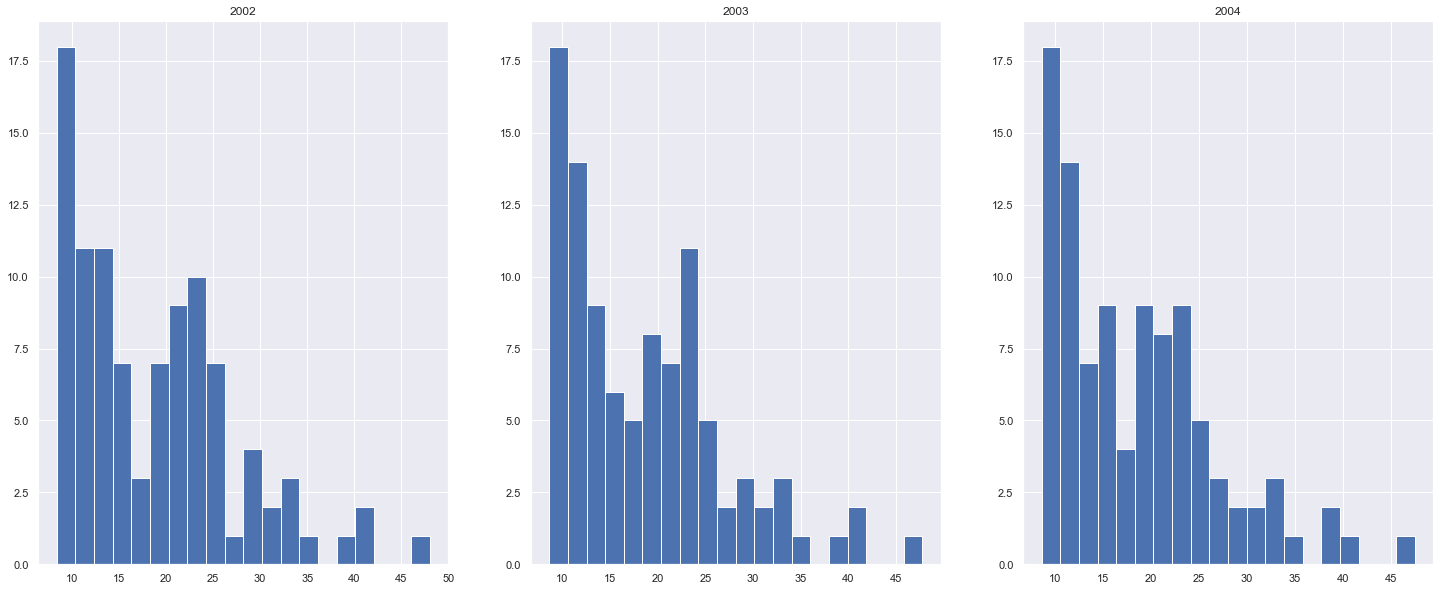

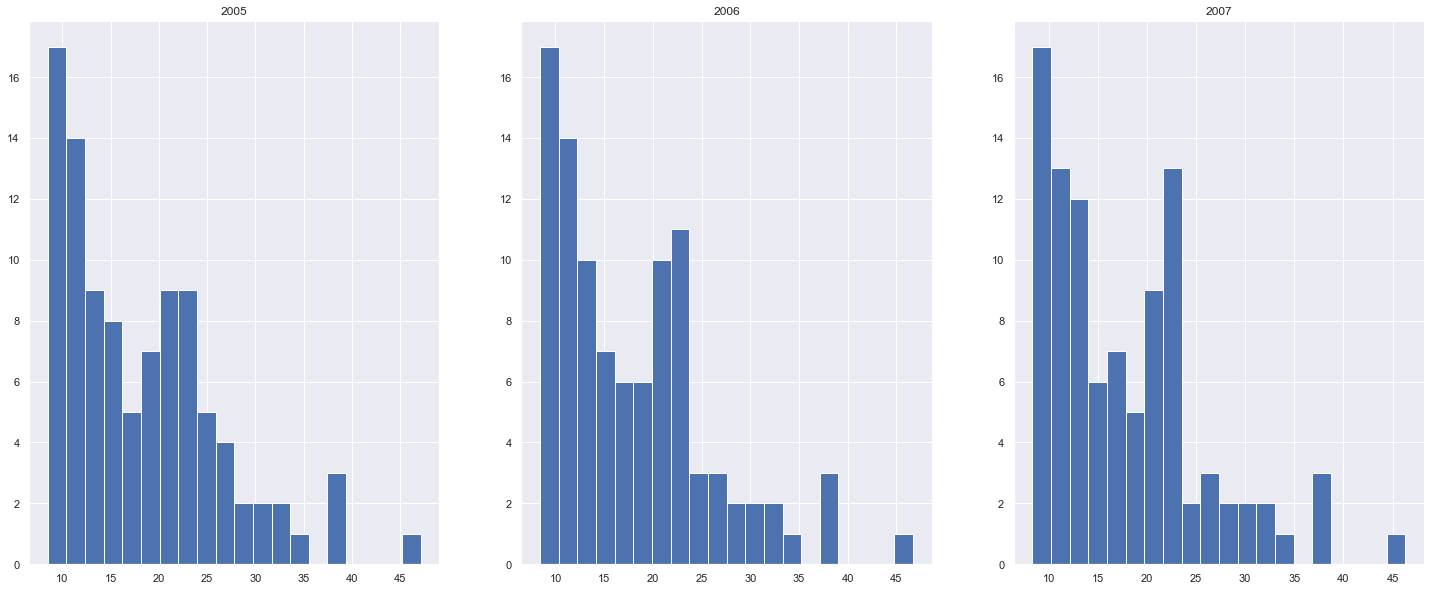

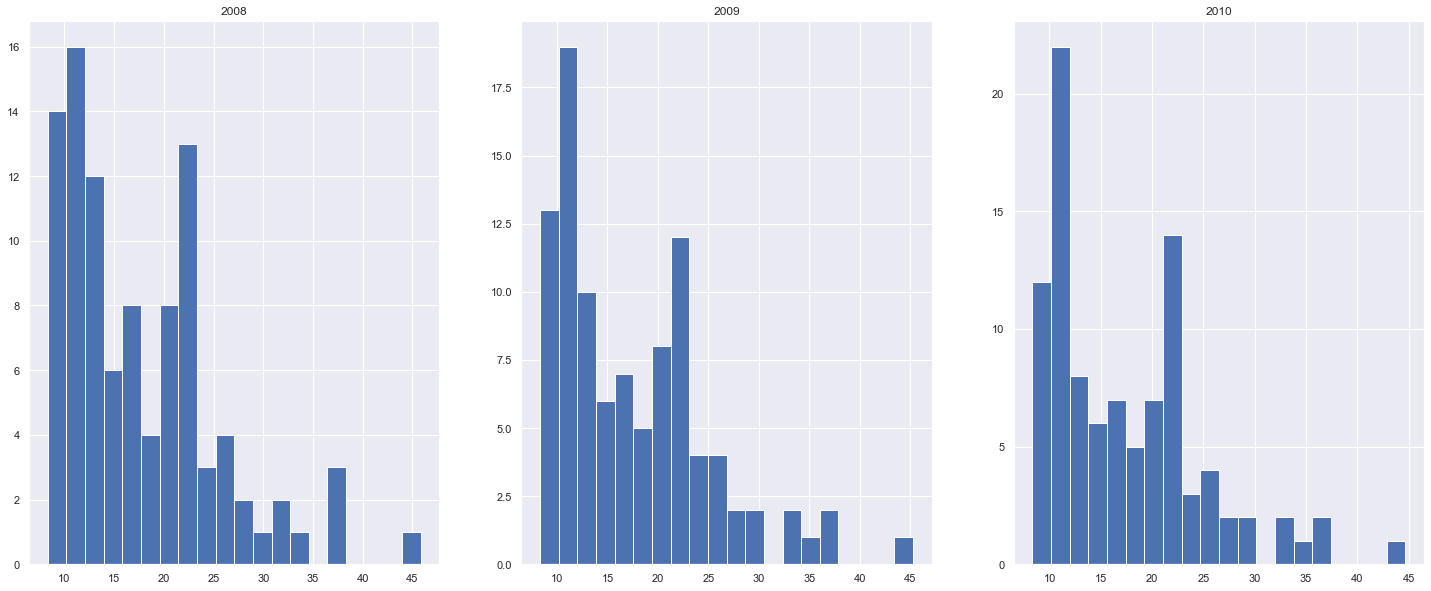

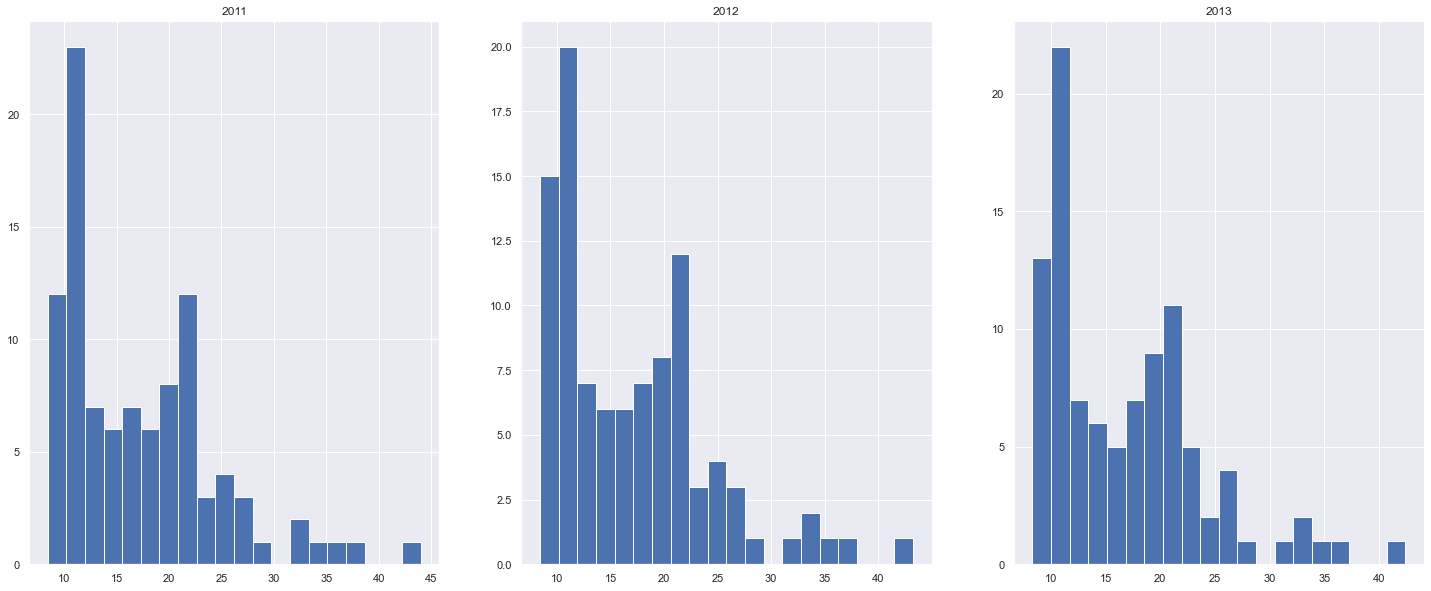

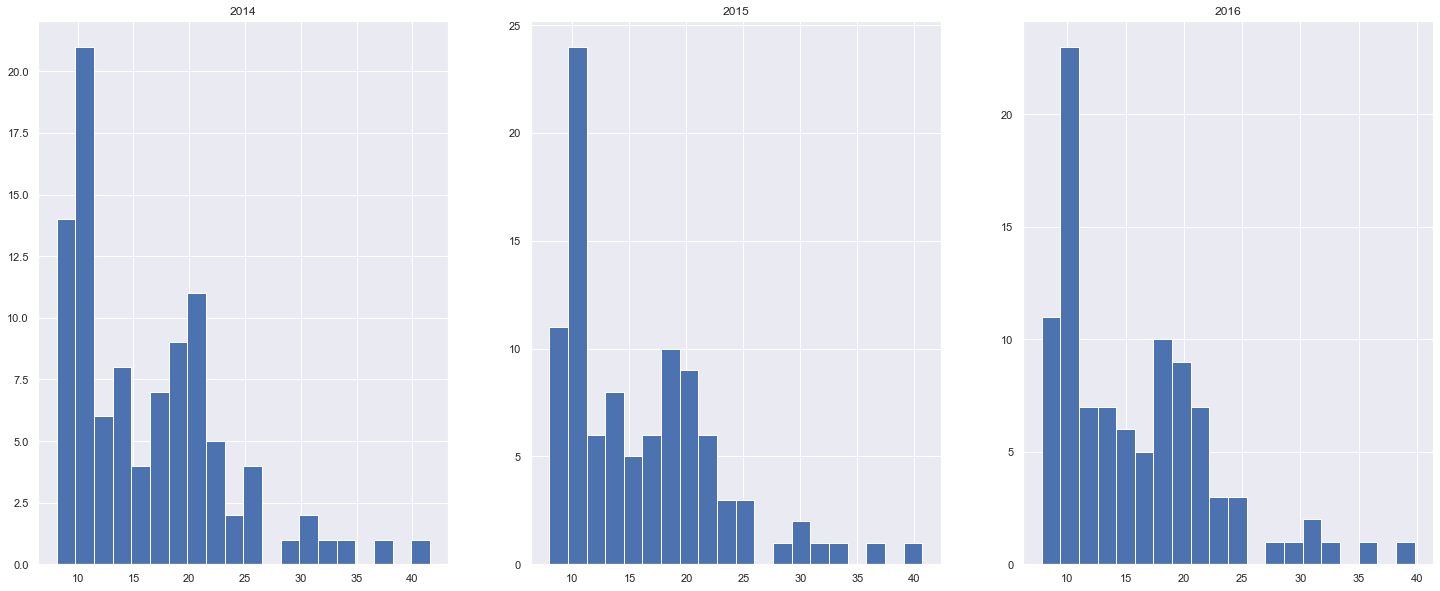

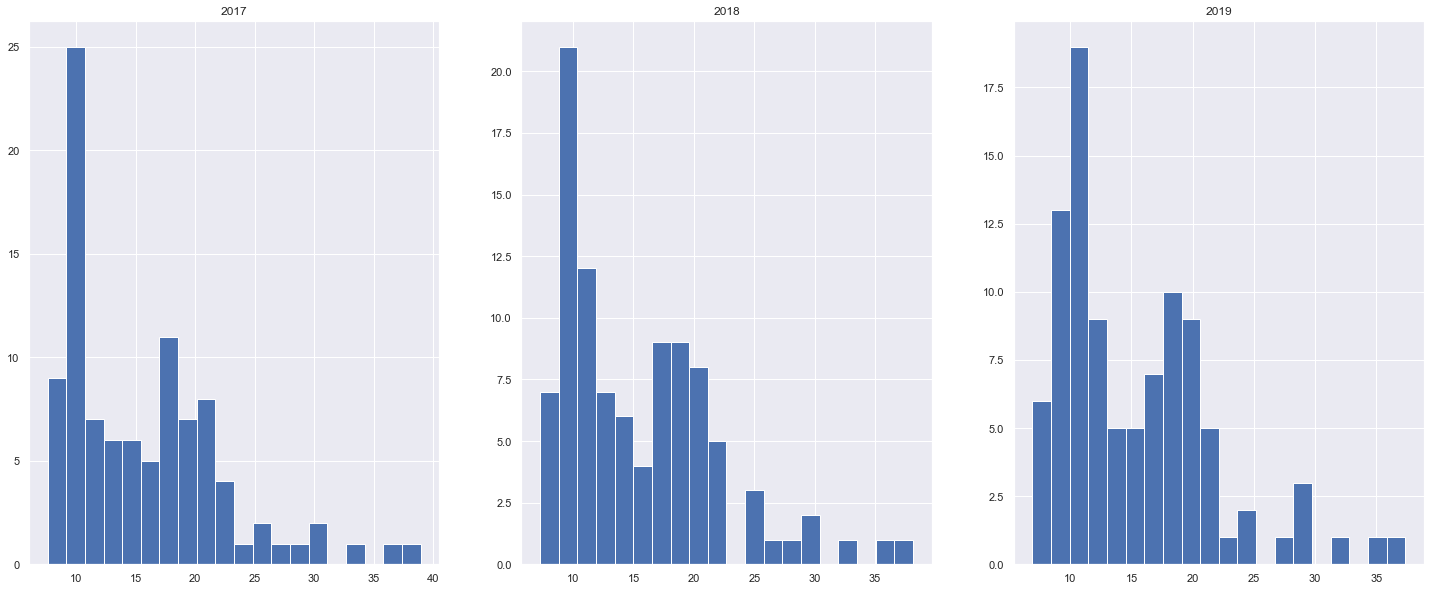

In [83]:
# Histograms of birth rates in affected countries over 21 years (from 1999-2019).
plt.rcParams["figure.figsize"] = (25,10)
list_birth = []

for year in range(0,21,3):
    a = birth_rate_9919.iloc[:, year : year + 1]
    b = birth_rate_9919.iloc[:, year+1 : year + 2]
    c = birth_rate_9919.iloc[:, year+2 : year + 3]
    figure, axis = plt.subplots(1, 3)
    axis[0].hist(a, bins = 20)
    axis[0].set_title(year+1999)
    axis[1].hist(b, bins = 20)
    axis[1].set_title(year+2000)
    axis[2].hist(c, bins = 20)
    axis[2].set_title(year+2001)
    #plt.show()
    list_birth.append(plt.gcf())
    

These histograms are consistent in its shape: they are all right skewed. This result means that the birth rates of these countries tend to be close to around 10-20 per 1000 people. We think this result makes sense because there is a specific amount of children people usually have and that number is not very high(therefore resulting in right skewed data – more people tend to have a small amount of children). Additionally, not all members of the population are capable of carrying children during a specific time.  
From looking at these 21 graphs, there aren’t any obvious outliers because most of the data are pretty close to each other. No data point is very far away from the center of the data points. None of the birth rates went over 50 per 1000.  
Since these graphs are histograms, they show the relationship between birth rate per 1000 people and the number of times a specific range of birth rates appear. Lower birth rates (10-20 per 1000) take up a higher proportion of the data, that means lower birth rates are more likely to appear.

In [70]:
death_rate_worldWide.describe()

,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,8.005367,7.900857,7.829194,7.832827,7.826194,7.671561,7.689622,7.624990,7.612418,7.560673,...,7.473173,7.428224,7.471408,7.424806,7.403367,7.506673,7.469969,7.542755,7.563959,7.548061
std,3.084975,3.058628,3.042308,3.078690,3.094457,3.013989,3.077541,3.023861,3.032780,2.964219,...,2.894960,2.822376,2.873386,2.826527,2.832844,2.952368,2.901007,2.980683,2.990214,2.942840
min,1.924000,1.869000,1.816000,1.763000,1.710000,1.658000,1.589000,1.497000,1.409000,1.330000,...,1.211000,1.173000,1.148000,1.132000,1.127000,1.131000,1.146000,1.169000,1.202000,1.244000
25%,5.771500,5.720250,5.662000,5.679250,5.724750,5.687500,5.605250,5.514750,5.518500,5.526750,...,5.517000,5.437500,5.485000,5.491500,5.449250,5.429000,5.407000,5.444750,5.476250,5.463750
50%,7.450500,7.464000,7.430500,7.356000,7.305000,7.279500,7.285000,7.219000,7.135500,7.193000,...,7.167000,7.131500,7.133500,7.100500,7.137000,7.063500,7.007500,7.055500,7.070000,7.084500
75%,9.800000,9.675000,9.489750,9.500000,9.616500,9.462500,9.435250,9.337250,9.281000,9.179000,...,9.175000,9.100000,9.257000,9.225000,9.025000,9.200000,9.175000,9.200000,9.175000,9.261500
max,17.199000,16.511000,15.757000,15.700000,16.000000,16.000000,16.600000,16.200000,16.400000,16.300000,...,15.200000,14.700000,15.000000,14.600000,15.100000,15.300000,15.100000,15.500000,15.400000,15.500000


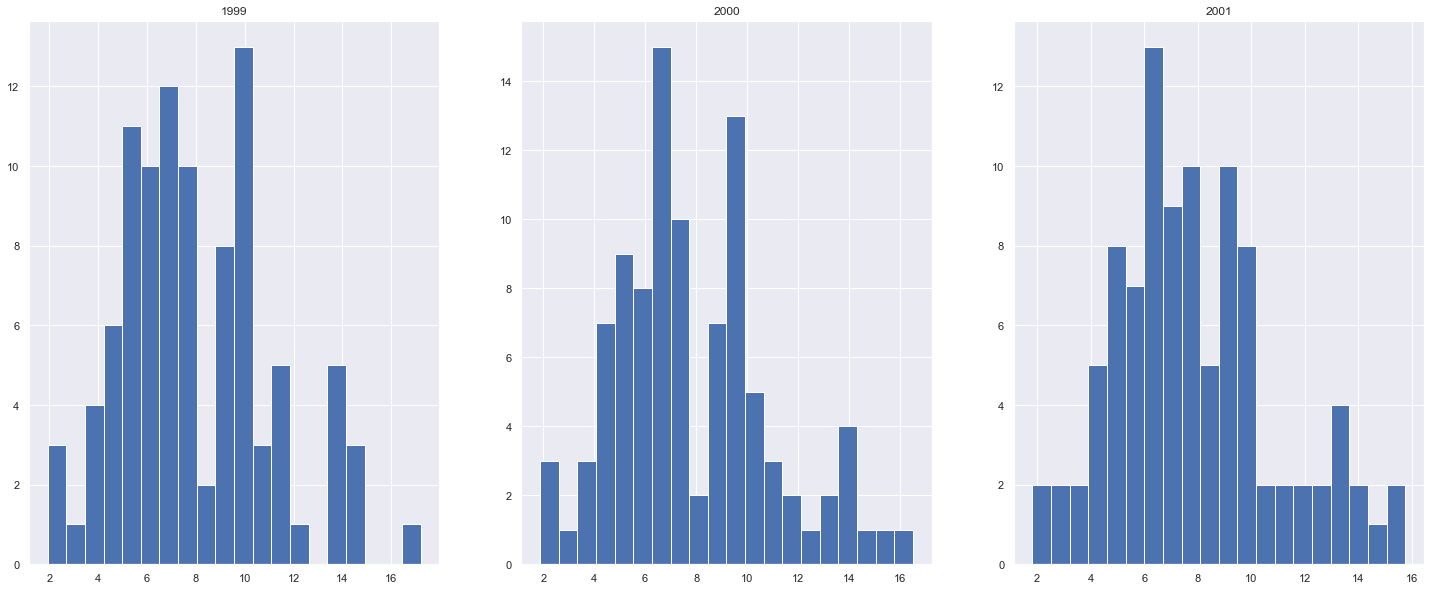

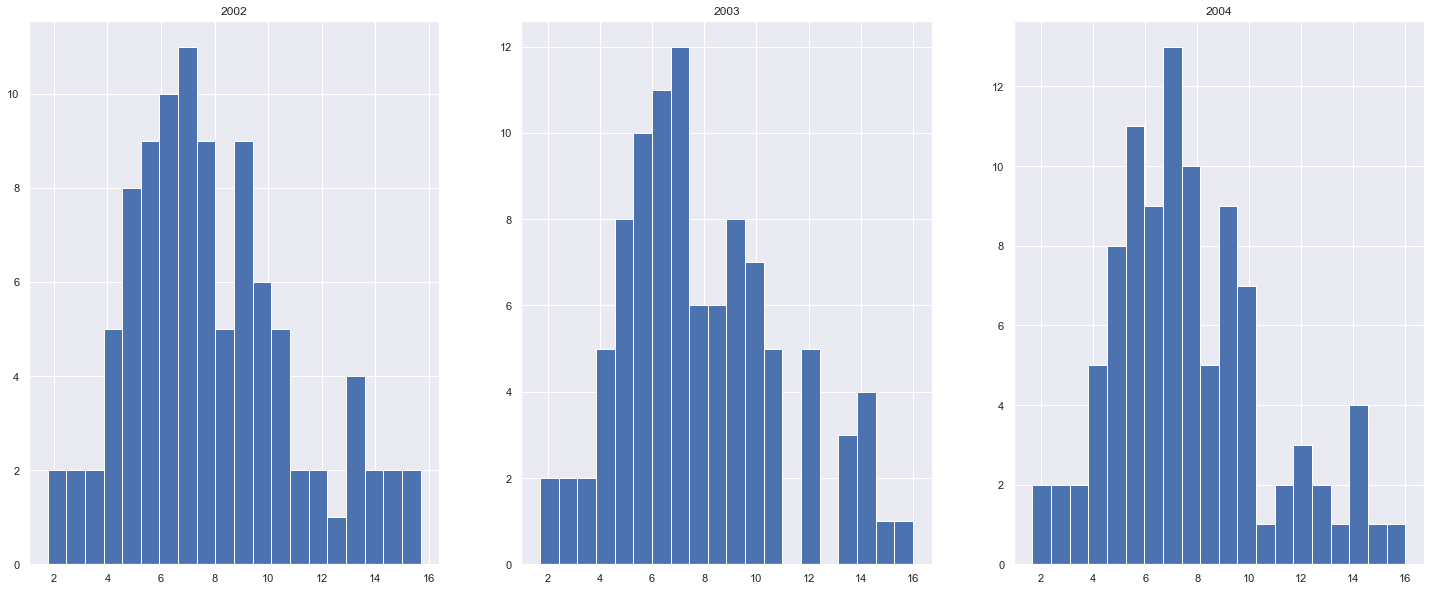

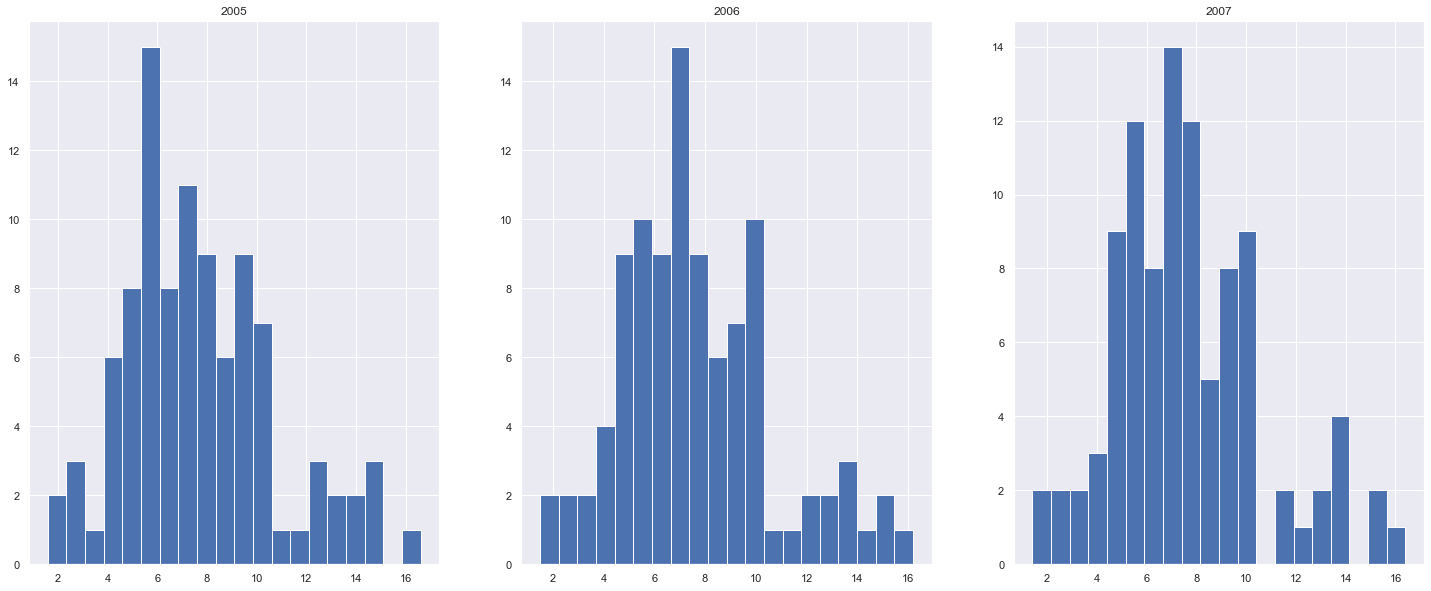

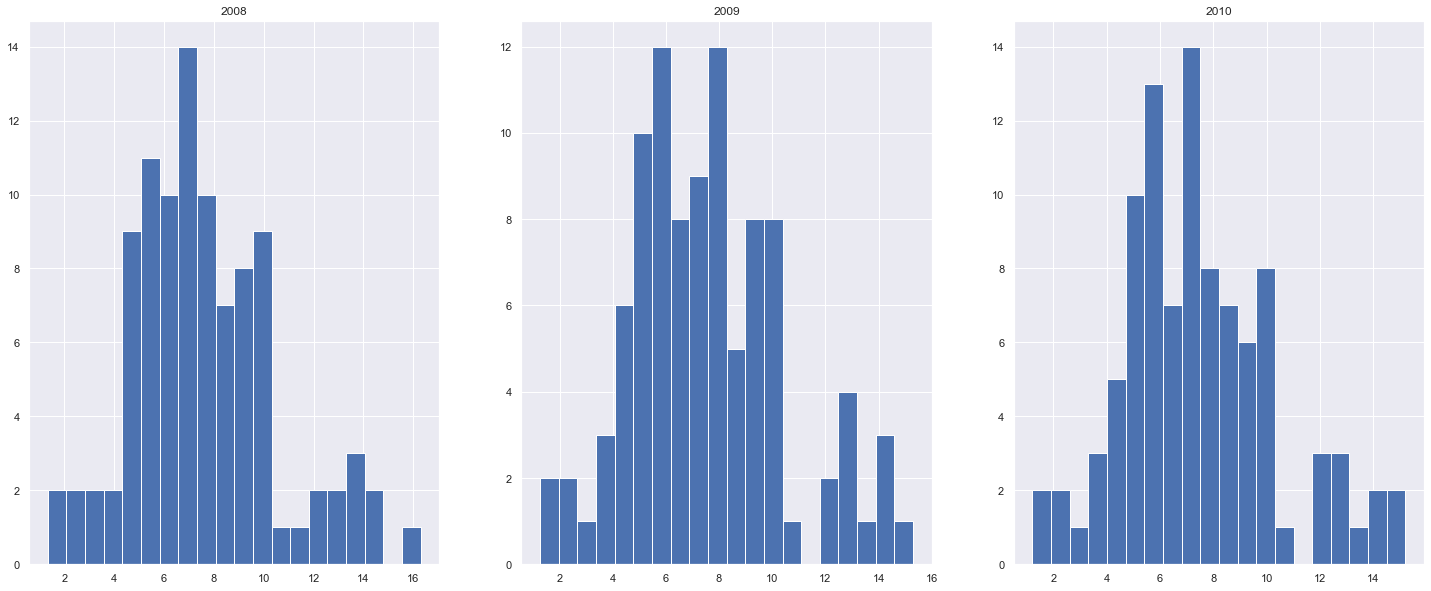

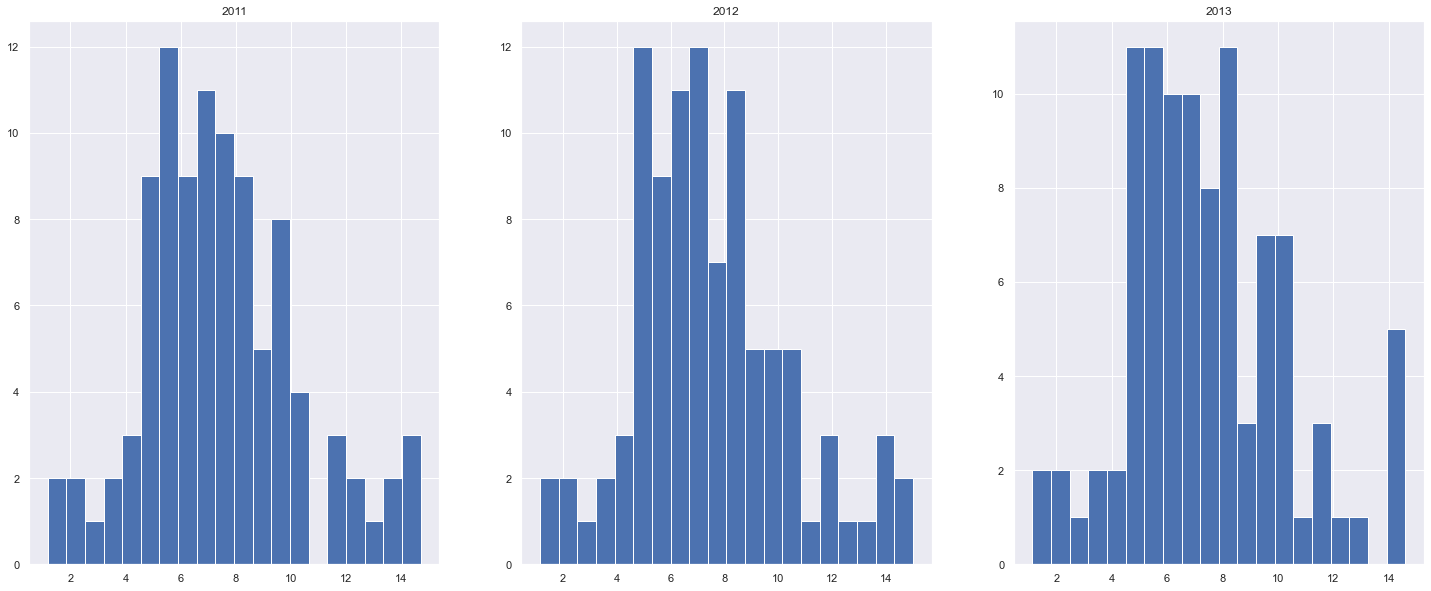

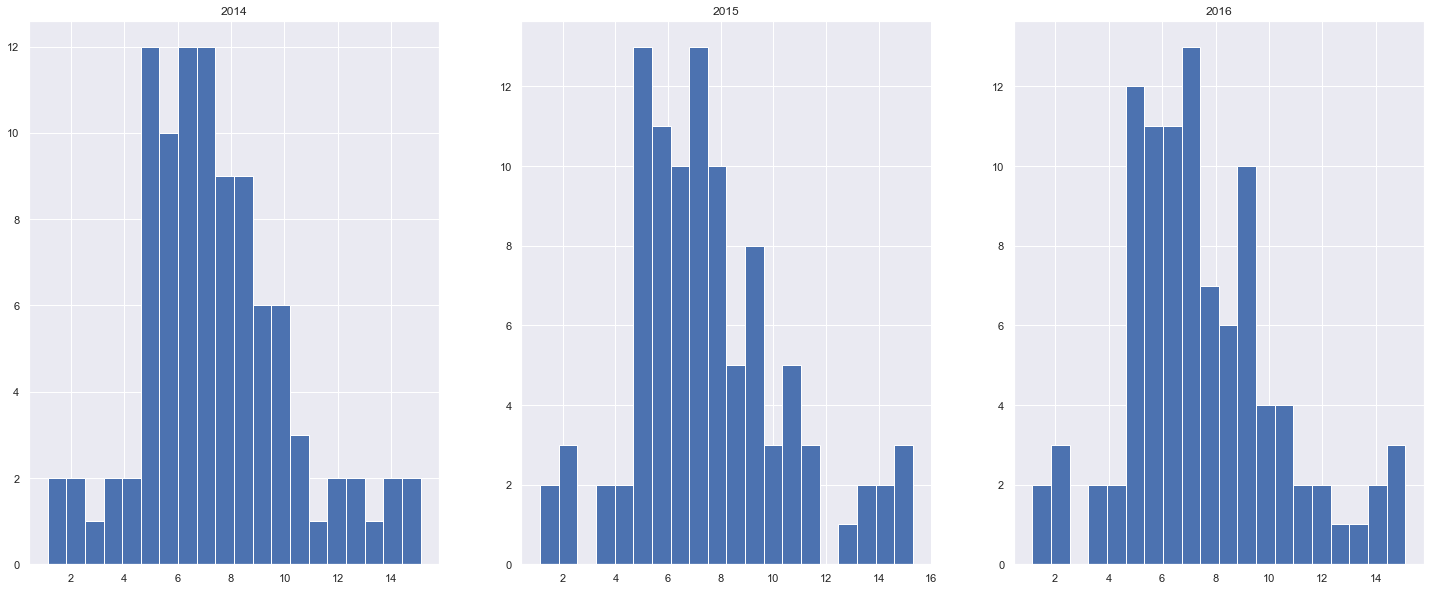

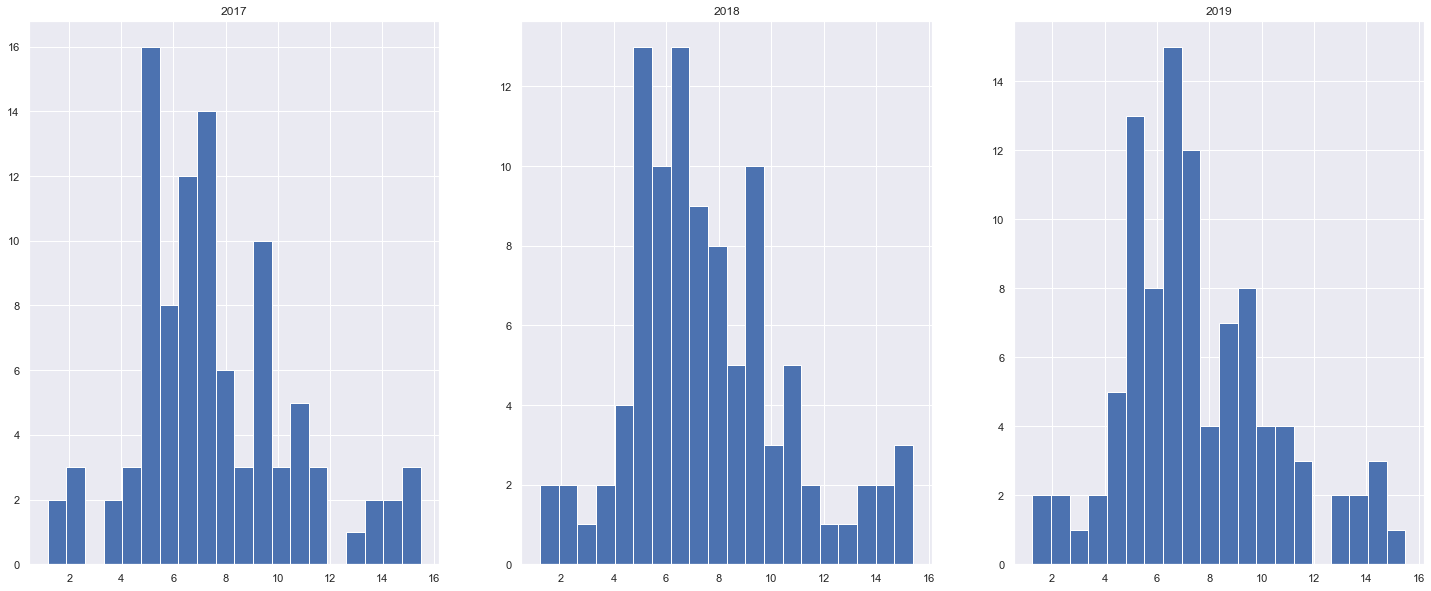

In [84]:
# Histograms of death rates in affected countries over 21 years (from 1999-2019).
plt.rcParams["figure.figsize"] = (25,10)
list_death = []
for year in range(0,21,3):
    e = death_rate_worldWide.iloc[:, year : year + 1]
    f = death_rate_worldWide.iloc[:, year+1 : year + 2]
    g = death_rate_worldWide.iloc[:, year+2 : year + 3]
    figure, axis = plt.subplots(1, 3)
    axis[0].hist(e, bins = 20)
    axis[0].set_title(year+1999)
    axis[1].hist(f, bins = 20)
    axis[1].set_title(year+2000)
    axis[2].hist(g, bins = 20)
    axis[2].set_title(year+2001)
    #plt.show()
    list_death.append(plt.gcf())

Distribution:
All the graphs show a consistent, relatively normal distribution in death rates. The average death rate for those countries from 1999-2019 is around 7-8 deaths per 1000 people, which is consistent with the average global death rate (the overall death rate in recent 20 years is around 7-8 deaths per 1000 population).  

Outliers:
There are no outliers in all the graphs.  

Relationship:
The two variables (death rate and count of death rate) are independent.